# NYC residential real estate opportunities

Emily Lorenzen

## Abstract

The decrease in residential real estate prices in NYC due to COVID-19 and extremely low mortgage rates presents a unique opportuny for investors. To assist potential investors, I used turnstile entry and exit data provided by the metropolitan transporation (MTA) data to highlight stations with the greatest growth of commuter traffic. I analyzed turnstile traffic indicative of commuter travel and uncovered neighborhoods that showed commuter-specific growth over the five-year timeframe between 2015 and 2019. 

## Data

The data for this analysis was provided by the MTA. For the analysis presented below, I limited the data to each March between 2015-2019. The year cutoff was chosen due to the inception pandemic-caused transportation decreases in 2020. The month was chosen since it does not contain holidays that are typically recognized by the workplace. The turnstile dataset contained The features required for the following analysis included station name, date, time, exits and entries. 

In addition, data for station coordinates was also provided by the MTA. Coordinate information was used to map findings onto a map of NYC. The features required for mapping results onto NYC included station name, latitude and longitude. 

## Tools and Algorithms

### Data scraping, cleaning and storage
Urllib was used to scrape data from the MTA website. Scraped data was then individually read into a pandas dataframe and concatenated as the entire set of raw data. The raw data was then cleaned by the following steps: (1) Entries where the column 'DESC' was not 'REGULAR' were dropped (these data points indicated an issue with the turnstile counter) (2) Duplicate rows were removed (3) Station names were changed to take into account inconsistent use of abbreviations (e.g. Av, Ave, and Avenue). 

### Additional feature calculation
After data cleaning, the following features were calculated: (1) A 'DATE_TIME' column with the date and time of each record in a datetime data type format (2) Entries and exits calculated as the current count subtracted by most recent previous count (to convert the cumulative to absolute frequency data) (3) Conversion of negative count datas to their absolute value, since some of the turnstile counters counter down instead of up (4) Remove of outliers based on a normal distribution and alpha = 0.05. SQLalchemy was used for data conversion from pandas dataframe to an SQL table. Both raw data and cleaned data with the additional features described above were uploaded into an SQL database for storage using sqlite3. 

### Data visualization
For analysis, data was queried from the sql database into pandas using sqlalchemy and additional calculations were made with numpy. Bar charts and histograms were created using matplotlib and seaborn. 

## Results/Design

To identify stations with the largest growth between 2015 and 2019, I found the percent change in average turnstile traffic (exits and entries) year over year for March. I then calculated the average percent change and plotted the ten turnstiles showing the highest average growth for when account for all days of the week or just weekdays (Fig 1). A weekdays only calculation was included to hone in on commuter-specific traffic. The top stations were the same in both cases except for Lexington AV 63. 

To further focus on commuter traffic, I then decided to investigate entries between 6:00 and 10:00 as an indicator of commuter traffic. Since the time intervals varied between stations, found the average entries per hr and split the data into hour-long intervals (e.g. an interval between 7:00 and 11:00 with 400 entries would then be 100 entries per hr). I then plotted the ten stations showing the highest increase in commuter traffic and compared it to the ten stations showing the highest increase in all entry traffic (Fig 2). Once again these stations were mostly the same. 

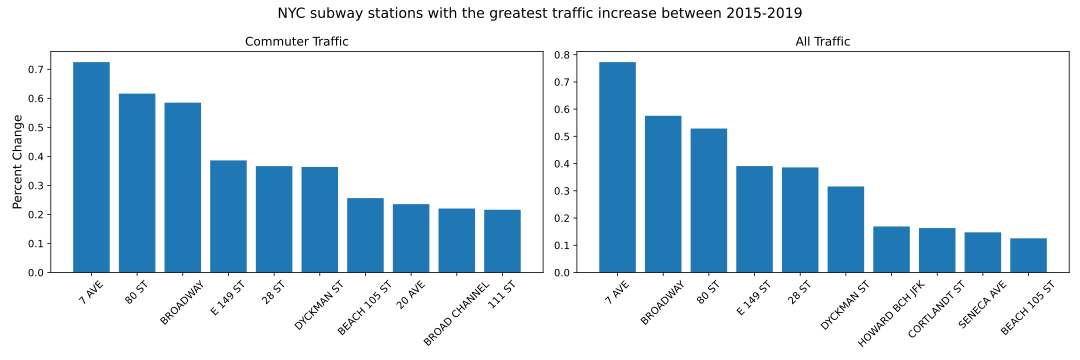

In [10]:
from IPython.core.display import SVG
SVG(filename = 'Overall_Change.SVG')

Fig 1: The top ten stations in terms of percent increase of traffic between 2015 and 2019 (data analyzed is from March of each year). Data from all commuter traffic (left plot) or all traffic (right plot) were used in the calculations.

I then normalized the change in commuter traffic by change in all traffic to identify stations that have had the largest increase in commuter-specific traffic. Normalizing commuter traffic changes revealed stations with traffic increase changes largely driven by commuter traffic (Fig 2). 

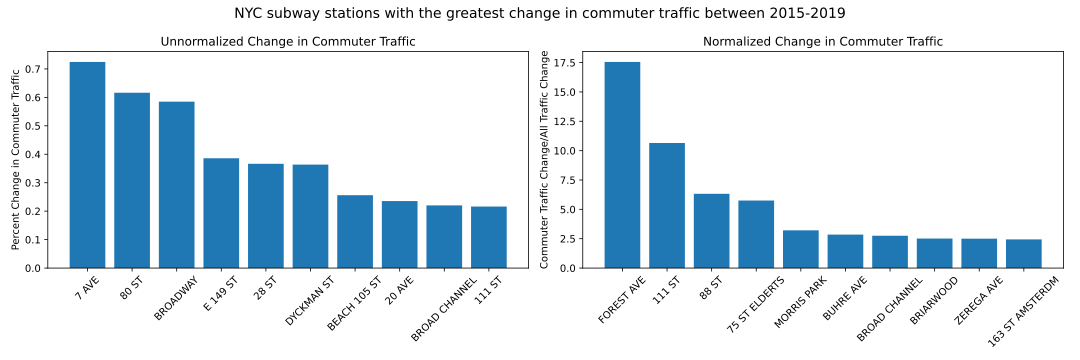

In [11]:
from IPython.core.display import SVG
SVG(filename = 'Commuter_Change.SVG')

Finally, I attempted to plot the normalized commuter changes on an NYC map using Tableau. However, only 193 stations were merge when using an inner join on station name between my calculated data with the longitude and latitude of each station. Since it was midnight at this point, I went ahead and plotted this small subset to gain familiarity with Tableau. Then Tableau wasn't plotting the data on a map, so after 1.5 hrs, I chose sanity over completion (Fig 3).

## Communication

Results were presented to fellow colleagues from Metis data science bootcamp and are posted on github. Data used to evaluate the conclusions are available from the MTA website. I can be reached at emily@emilylorenzen.com for additional inquiries. 

## Acknowledgements

MTA provided the data sources. I thank Rita Biagioli, Leon Johnson, and Ian Livingston for help in experimental design and technial assistance. 